In [1]:
from tensorflow.keras.models import Sequential
# To initialize neural network
from tensorflow.keras.layers import Convolution2D
# Images are two dimensional, concolution step
from tensorflow.keras.layers import MaxPooling2D
# Pooling step
from tensorflow.keras.layers import Flatten
# Convert pools feature map into this large feature vector
from tensorflow.keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#Initializing the CNN
#there is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2))
classifier.add( Convolution2D(32,3,3, activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2), strides = 2))
classifier.add(Flatten())
classifier.add(Dense( 128, activation = 'relu'))
classifier.add(Dense(2, activation = 'softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

2021-12-09 00:22:47.839773: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-09 00:22:47.841347: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-09 00:22:47.853097: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:

#binary outcome

In [4]:
#compiling the cnn



In [5]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [6]:
# Train from scratch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/train',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/test',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.001)

In [8]:

results = classifier.fit(
                    train_generator,
                    steps_per_epoch=163 ,
                    epochs=15,
                    validation_data=validation_generator,
                    #validation_steps=len(validation_dataset.filenames )//32,
                    verbose=1,
                    callbacks=[earlyStopping, mcp_save,learning_rate_reduction])

2021-12-09 00:22:50.108733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-09 00:22:50.123958: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3800005000 Hz


Epoch 1/15
163/163 [==============================] - 214s 1s/step - loss: 0.5802 - accuracy: 0.7362 - val_loss: 0.5600 - val_accuracy: 0.7580
Epoch 2/15
163/163 [==============================] - 53s 328ms/step - loss: 0.4356 - accuracy: 0.8114 - val_loss: 0.4351 - val_accuracy: 0.7949
Epoch 3/15
163/163 [==============================] - 55s 335ms/step - loss: 0.3194 - accuracy: 0.8608 - val_loss: 0.3748 - val_accuracy: 0.8269
Epoch 4/15
163/163 [==============================] - 54s 331ms/step - loss: 0.2901 - accuracy: 0.8741 - val_loss: 0.3916 - val_accuracy: 0.8045
Epoch 5/15
163/163 [==============================] - 54s 331ms/step - loss: 0.3121 - accuracy: 0.8740 - val_loss: 0.3545 - val_accuracy: 0.8429
Epoch 6/15
163/163 [==============================] - 54s 330ms/step - loss: 0.2461 - accuracy: 0.8974 - val_loss: 0.4292 - val_accuracy: 0.8157
Epoch 7/15
163/163 [==============================] - 54s 334ms/step - loss: 0.2364 - accuracy: 0.8977 - val_loss: 0.3351 - val_accu

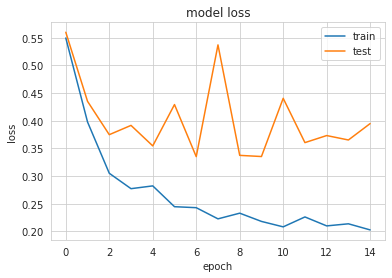

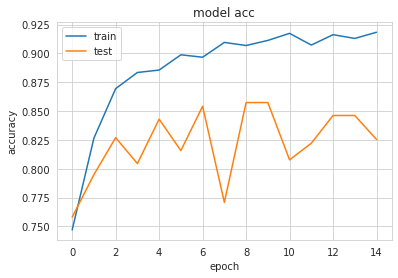

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = results
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Classification Report

In [12]:
import itertools
plt.rcParams['figure.figsize'] = (5, 5)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matricesfor61classbangengtype.png', dpi=100)

[[143  91]
 [ 18 372]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       234
           1       0.80      0.95      0.87       390

    accuracy                           0.83       624
   macro avg       0.85      0.78      0.80       624
weighted avg       0.84      0.83      0.82       624



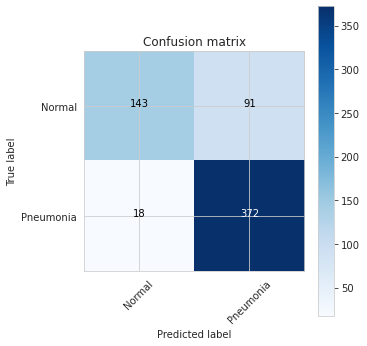

In [13]:
from sklearn.metrics import confusion_matrix
import numpy
pred= classifier.predict(validation_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
#print("np.argmax")
#print(pred)
true_classes = validation_generator.classes
#print(test_generator.filenames)
#print("true classes")
#print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report)

Found 16 images belonging to 2 classes.
np.argmax
[1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
true classes
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
[[2 6]
 [1 7]]
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.54      0.88      0.67         8

    accuracy                           0.56        16
   macro avg       0.60      0.56      0.52        16
weighted avg       0.60      0.56      0.52        16



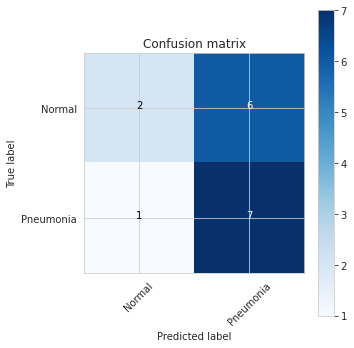

In [26]:
from sklearn.metrics import confusion_matrix
import numpy
test_generator = test_dataset.flow_from_directory(
    '/s/fir/e/nobackup/Fresh-Phish/transformer_exps/progs/mirdul-notebooks/ml_project/chest_xray/val',
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

pred= classifier.predict(test_generator)
#print("pred")
#print(pred)
pred = np.argmax(pred,axis=1)
print("np.argmax")
print(pred)
true_classes = test_generator.classes
#print(test_generator.filenames)
print("true classes")
print(true_classes)
cf = confusion_matrix(true_classes,pred)
print(cf)
plot_confusion_matrix(confusion_matrix(true_classes, pred) ,classes = ['Normal','Pneumonia'])
import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report) 